### Oxygen Evals in Saanich Inlet

In [25]:
import xarray as xr
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

import matplotlib.patches as mpatches
import scipy.stats as stat

In [26]:
mesh = nc.Dataset('/ocean/atall/MOAD/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202108.nc')

meshb = nc.Dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc')
bathyb = nc.Dataset('/ocean/atall/MOAD/grid/bathymetry_202310b.nc')
grid = xr.open_dataset('/ocean/atall/MOAD/grid/bathymetry_202310b.nc', mask_and_scale=False)

depthb = meshb.variables['gdept_0'][:]
with xr.open_dataset('/ocean/atall/MOAD/grid/mesh_mask_202310b.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy
    long = mesh.nav_lon
    latg = mesh.nav_lat
grid_dir = Path("/ocean/atall/MOAD/grid/")
grid_map = Path("grid_from_lat_lon_mask999.nc")
grid_lons_lats = xr.open_dataset(grid_dir / grid_map)

In [27]:
# hourly matching data
bot202111_12 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_20120101_20121231.csv')
bot202410_12 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410_bot_20120101_20121231.csv')
bot202111_13 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202111/ObsModel_202111_bot_20130101_20131231.csv')
bot202410_13 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410_bot_20130101_20131231.csv')

df202111 = pd.concat([bot202111_12, bot202111_13], ignore_index=True)
df202410 = pd.concat([bot202410_12, bot202410_13], ignore_index=True)

/tmp/ipykernel_4130602/3583211505.py:4: UserWarning: linewidths is ignored by contourf
  ax.contourf(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')


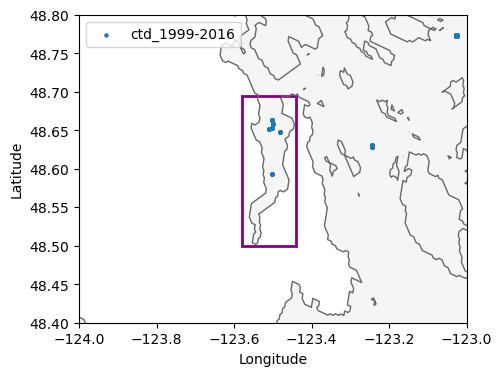

In [28]:
fig, ax = plt.subplots(1,1,figsize=(5, 4))
lon1,lon2,lat1,lat2 = (-123.58,-123.44,48.5,48.695)

ax.contourf(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(long, latg, mbathy[0,:,:], linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([48.4,48.8])
ax.set_xlim([-124,-123])

# plot the location of observations
ax.scatter(df202111.Lon, df202111.Lat, s=5, label="ctd_1999-2016")

ax.legend()

left, bottom, width, height = (lon2, lat1, lon1-lon2, lat2-lat1)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        #alpha=0.1
                        color="purple",
                       linewidth=2,
                       label="Puget Sound")

plt.gca().add_patch(rect)

In [29]:
df_21 = df202111[ df202111['Lon'].between(lon1, lon2) & df202111['Lat'].between(lat1, lat2) ]
df_24 = df202410[ df202410['Lon'].between(lon1, lon2) & df202410['Lat'].between(lat1, lat2) ]


In [30]:
def profiles(tracer,colour,ax):
    if tracer == 'Salinity':
        t_obs = 'AbsSal'
        t_mod = 'mod_vosaline'
        unit = 'g/kg'
        unity ='meter'
    elif tracer == 'DO':
        t_obs = 'Oxygen_Dissolved'
        t_mod = 'mod_dissolved_oxygen'
        unit = 'uM'
        unity ='meter'

    avg_obs, binsa, _ = stat.binned_statistic(-df_21['Z'][(np.isfinite(df_21[t_obs]))],df_21[t_obs][(np.isfinite(df_21[t_obs]))],statistic='mean',bins=8)
    avg_21, binsb, _ = stat.binned_statistic(-df_21['Z'][(np.isfinite(df_21[t_mod]))],df_21[t_mod][(np.isfinite(df_21[t_mod]))],statistic='mean',bins=8)
    avg_24, binsc, _ = stat.binned_statistic(-df_24['Z'][(np.isfinite(df_24[t_mod]))],df_24[t_mod][(np.isfinite(df_24[t_mod]))],statistic='mean',bins=8)

    ax.plot(avg_obs, binsa[:-1], lw=2,label='obs')
    ax.plot(avg_21, binsb[:-1], lw=2,label='202111')
    ax.plot(avg_24, binsc[:-1], lw=2,label='202410')

    ax.set_xlabel(unit)
    ax.set_ylabel(unity)

2012-2013


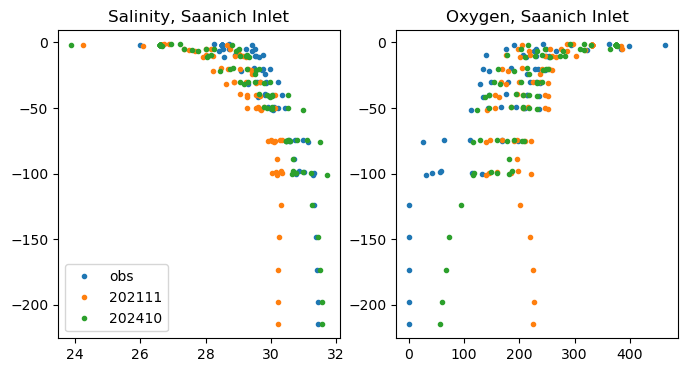

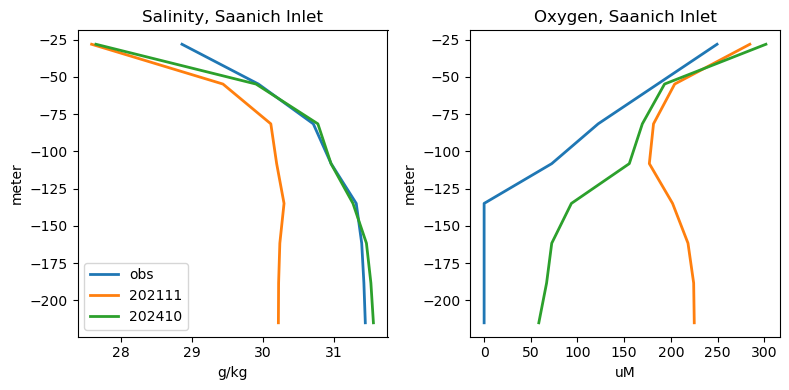

In [31]:
print('2012-2013')
i, j = (0, 1)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
title = 'Salinity, Saanich Inlet'
ax[i].set_title(title,fontsize=12)
title = 'Oxygen, Saanich Inlet'
ax[j].set_title(title,fontsize=12)
ax[i].plot(df_24.AbsSal, -df_24.Z, '.',label='obs')
ax[i].plot(df_21.mod_vosaline, -df_21.Z, '.', label='202111')
ax[i].plot(df_24.mod_vosaline, -df_24.Z, '.', label='202410')
ax[i].legend()
ax[j].plot(df_24.Oxygen_Dissolved, -df_24.Z, '.',label='obs')
ax[j].plot(df_21.mod_dissolved_oxygen, -df_21.Z, '.', label='202111')
ax[j].plot(df_24.mod_dissolved_oxygen, -df_24.Z, '.', label='202410')

fig, ax = plt.subplots(1, 2, figsize=(8,4))
title = 'Salinity, Saanich Inlet'
ax[i].set_title(title,fontsize=12)
title = 'Oxygen, Saanich Inlet'
ax[j].set_title(title,fontsize=12)

# plot profiles Saaanich Inlet

profiles('Salinity','k',ax[0])
profiles('DO','k',ax[1])
ax[0].legend()
plt.tight_layout()